# Getting Started with Image Processing with Python.

In [2]:
pip install numpy matplotlib pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt

## Exercise - 1

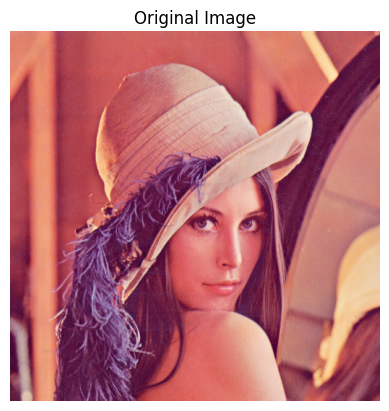

In [4]:
#Import the image 
image_path = "Lenna.png"
image = Image.open(image_path)

# Dsiplay the image
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

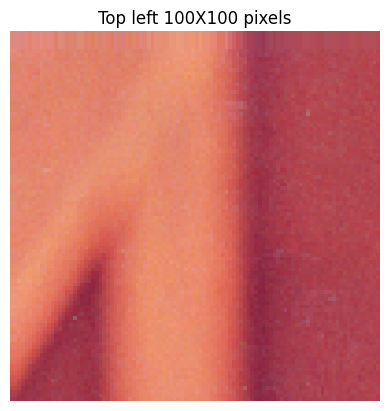

In [5]:
#Convert image into Numpy Array
image_array = np.array(image)

#Extract the Top Left image
top_left_corner = image_array[:100, :100]

#Display the Extracted Image
plt.imshow(top_left_corner)
plt.axis("off")
plt.title("Top left 100X100 pixels")
plt.show()

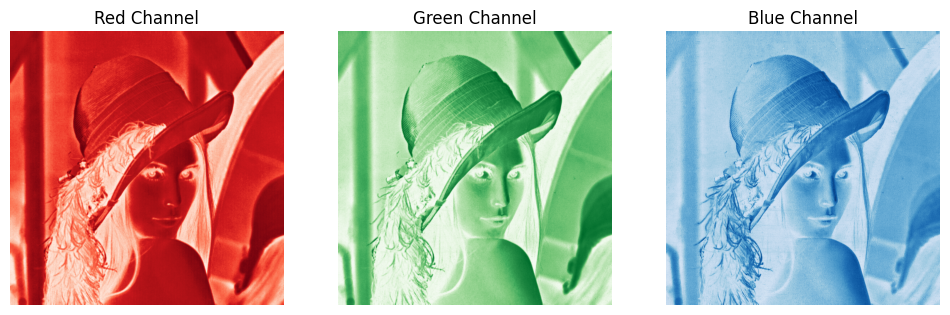

In [6]:
#Extract RGB Channels
r_channel = image_array[:,:,0]
g_channel = image_array[:,:,1]
b_channel = image_array[:,:,2]

#Display the Three Channels
fig, axes = plt.subplots(1,3, figsize=(12,4))

#For Red channel
axes[0].imshow(r_channel, cmap="Reds")
axes[0].set_title("Red Channel")
axes[0].axis("off")

#For Green Channel
axes[1].imshow(g_channel, cmap="Greens")
axes[1].set_title("Green Channel")
axes[1].axis("off")

#For Blue Channel
axes[2].imshow(b_channel, cmap="Blues")
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.show()

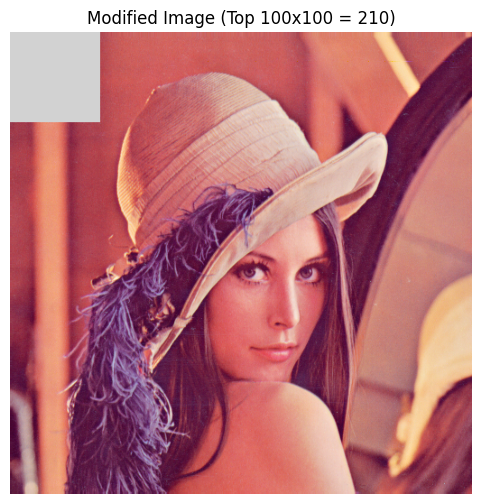

In [7]:
# Modify the top-left 100x100 pixels to gray (210)
modified_image = image_array.copy()
modified_image[:100, :100] = 210

# Display the modified image
plt.figure(figsize=(6,6))
plt.imshow(modified_image)
plt.axis("off")
plt.title("Modified Image (Top 100x100 = 210)")
plt.show()

## Exercise - 2

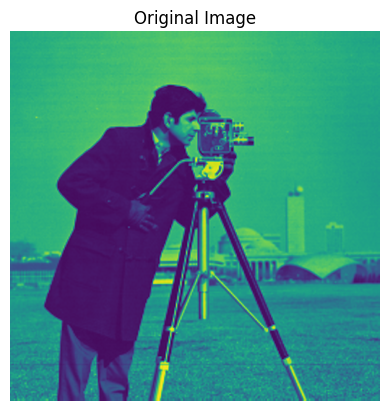

In [10]:
#Import the image 
image2_path = "cameraman.png"
gray_image = Image.open(image2_path)

# Dsiplay the image
plt.imshow(gray_image)
plt.axis("off")
plt.title("Original Image")
plt.show()

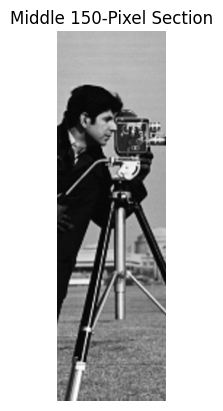

In [11]:
# Convert image to NumPy array
gray_array = np.array(gray_image)

# Get image dimensions
height, width = gray_array.shape

# Extract middle 150 pixels
start = (width // 2) - 75  # Finding center section
display_section = gray_array[:, start:start+150]

# Display the extracted section
plt.imshow(display_section, cmap='gray')
plt.axis("off")
plt.title("Middle 150-Pixel Section")
plt.show()

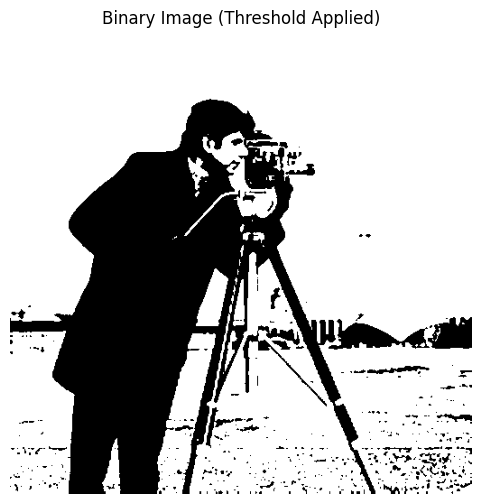

In [12]:
# Apply threshold: Set pixels < 100 to 0, others to 255
binary_image = np.where(gray_array < 100, 0, 255).astype(np.uint8)

# Display binary image
plt.figure(figsize=(6,6))
plt.imshow(binary_image, cmap='gray')
plt.axis("off")
plt.title("Binary Image (Threshold Applied)")
plt.show()

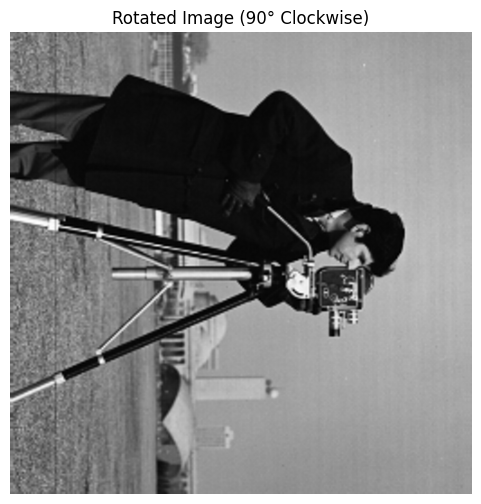

In [13]:
# Rotate 90 degrees clockwise
rotated_image = np.rot90(gray_array, k=3)

# Display rotated image
plt.figure(figsize=(6,6))
plt.imshow(rotated_image, cmap='gray')
plt.axis("off")
plt.title("Rotated Image (90° Clockwise)")
plt.show()

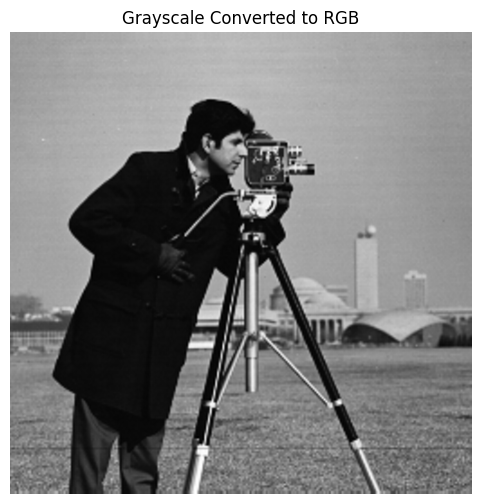

In [14]:
# Convert grayscale to RGB by replicating grayscale values across R, G, B channels
rgb_image = np.stack([gray_array]*3, axis=-1)

# Display RGB image
plt.figure(figsize=(6,6))
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Grayscale Converted to RGB")
plt.show()

# Image Compression and Decompression using PCA

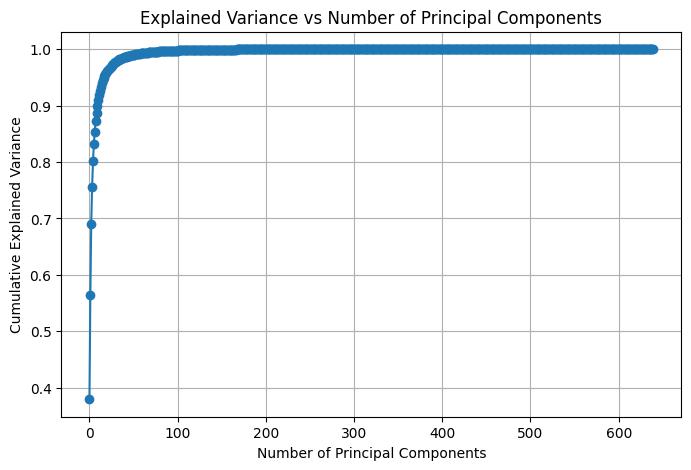

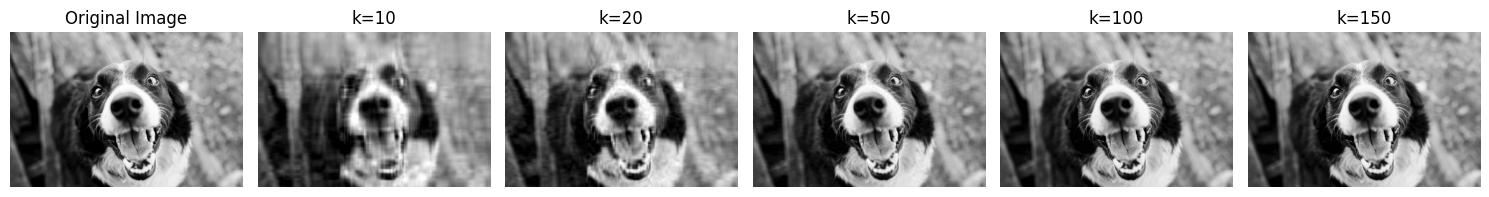

In [19]:
# Load and convert image to grayscale
image = Image.open("dog.png").convert("L")  # Convert to grayscale
img_array = np.array(image, dtype=np.float64)  # Convert to NumPy array

# Standardize data by centering (zero mean)
mean_val = np.mean(img_array, axis=0)
std_data = img_array - mean_val

# Compute Covariance Matrix
cov_matrix = np.cov(std_data, rowvar=False)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues in descending order and get corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Compute explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative variance to determine number of components
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Principal Components')
plt.grid()
plt.show()

# Function to reconstruct image with k principal components
def reconstruct_image(k):
    top_eigenvectors = eigenvectors[:, :k]  # Select top k eigenvectors
    reduced_data = np.dot(std_data, top_eigenvectors)  # Transform to lower dimension
    reconstructed_img = np.dot(reduced_data, top_eigenvectors.T) + mean_val  # Reconstruct
    return np.clip(reconstructed_img, 0, 255)  # Ensure pixel values are in range

# Experiment with different k values
k_values = [10, 20, 50, 100, 150]  # Different number of principal components
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))  # 1 extra for original image

# Original image
axes[0].imshow(img_array, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Reconstructed images
for i, k in enumerate(k_values):
    reconstructed = reconstruct_image(k)
    axes[i+1].imshow(reconstructed, cmap='gray')  # Start from index 1
    axes[i+1].set_title(f"k={k}")
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

In [22]:
# Define explained variance thresholds
variance_thresholds = [0.50, 0.75, 0.90, 0.99]

# Find the number of principal components required to reach each threshold
k_values = [np.argmax(cumulative_variance >= threshold) + 1 for threshold in variance_thresholds]

print(f"Number of Principal Components for Variance Levels:")
for v, k in zip(variance_thresholds, k_values):
    print(f"{v*100:.0f}% variance -> {k} components")

Number of Principal Components for Variance Levels:
50% variance -> 2 components
75% variance -> 4 components
90% variance -> 11 components
99% variance -> 51 components
